In [1]:
from glob import glob
import pandas as pd
import json
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import numpy as np

sns.set(style='white',  font='sans-serif', font_scale=2)

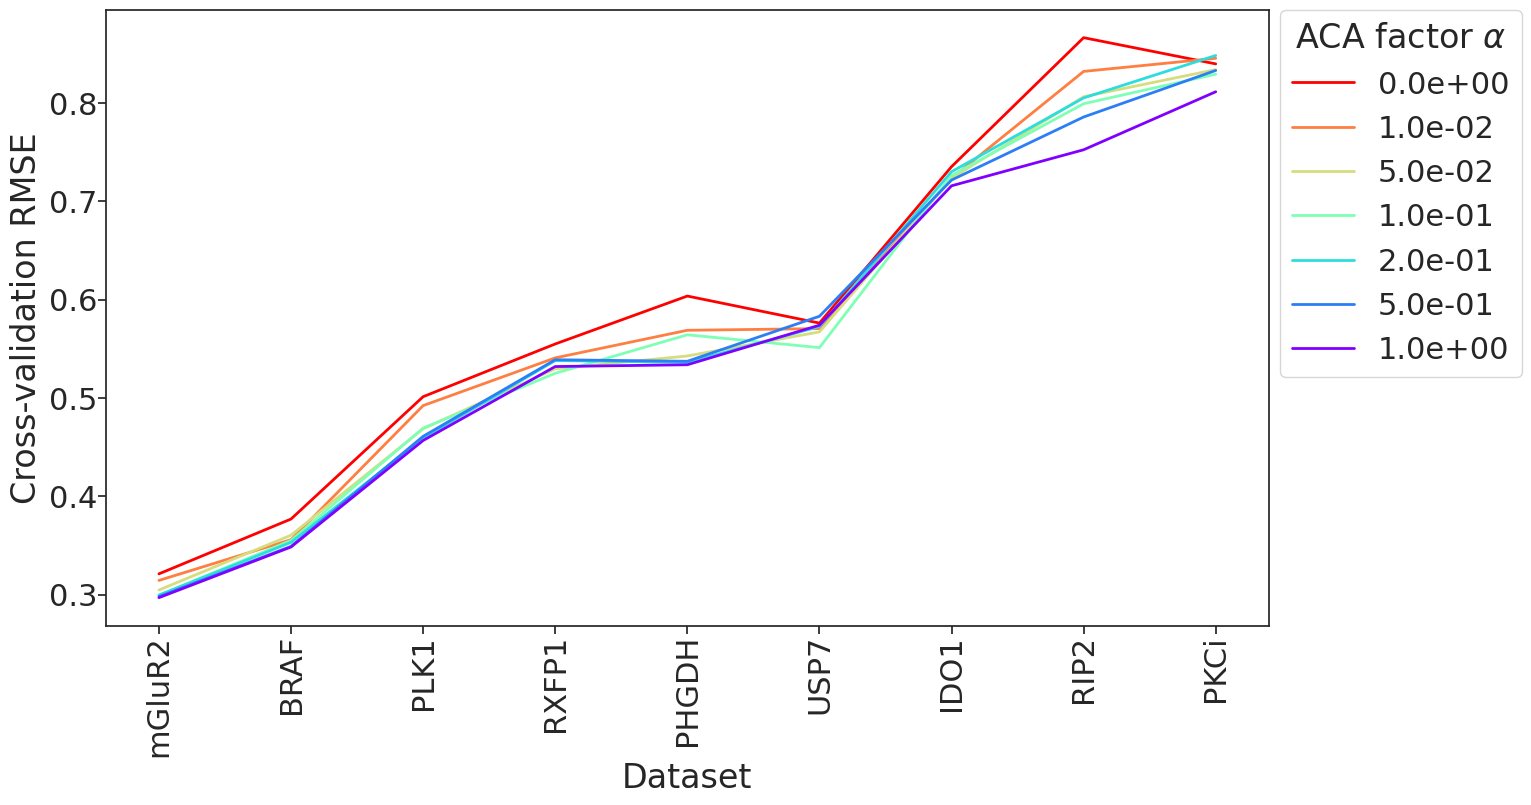

In [2]:

gs = glob('./benchmark_performance/mae_aca_opt_cliff/*/alpha_performance.csv')

ps = []
for path in gs:
    dataset = path.split('/')[-2]
    res = pd.read_csv(path, index_col=0)
    res['dataset'] = dataset
    ps.append(res)
    
dfp = pd.concat(ps)


dfp1 = pd.pivot_table(dfp, values='rmse', index='dataset', columns='alpha')
fig, ax = plt.subplots(figsize=(15, 8))
idx = dfp1.mean(axis=1).sort_values(ascending=True).index.tolist()
dfp1.columns = dfp1.columns.map(lambda x:'%.1e' % x)
dfp1 = dfp1.loc[idx]

dfp1.plot(ax= ax, colormap ='rainbow_r', lw = 2,)

ax.tick_params(left='off',  bottom='off', pad=.5,)

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title=r'ACA factor $\alpha$')

ax.set_ylabel('Cross-validation RMSE')
ax.set_xlabel('Dataset')


ax.set_xticks(range(len(dfp1)))

ax.set_xticklabels(dfp1.index, rotation=90, )

fig.savefig("./benchmark_performance/ACA_alpha_effect.pdf",  bbox_inches='tight')

In [3]:
dfp1

alpha,0.0e+00,1.0e-02,5.0e-02,1.0e-01,2.0e-01,5.0e-01,1.0e+00
dataset,,,,,,,
mGluR2,0.321095,0.314419,0.304653,0.299219,0.299526,0.298034,0.296890
BRAF,0.376834,0.355865,0.360402,0.355042,0.353142,0.349046,0.348416
PLK1,0.501207,0.492154,0.468598,0.469240,0.459096,0.460915,0.456682
RXFP1,0.554812,0.540662,0.529541,0.525016,0.537952,0.538767,0.531869
PHGDH,0.603537,0.568725,0.542597,0.564128,0.536087,0.537197,0.533687
USP7,0.576057,0.570425,0.567075,0.551098,0.572450,0.582964,0.573899
IDO1,0.735056,0.723306,0.723310,0.726187,0.729943,0.721452,0.715606
RIP2,0.866214,0.831914,0.806161,0.799063,0.804963,0.785557,0.752251
PKCi,0.839547,0.845258,0.833743,0.829064,0.848097,0.832882,0.811232


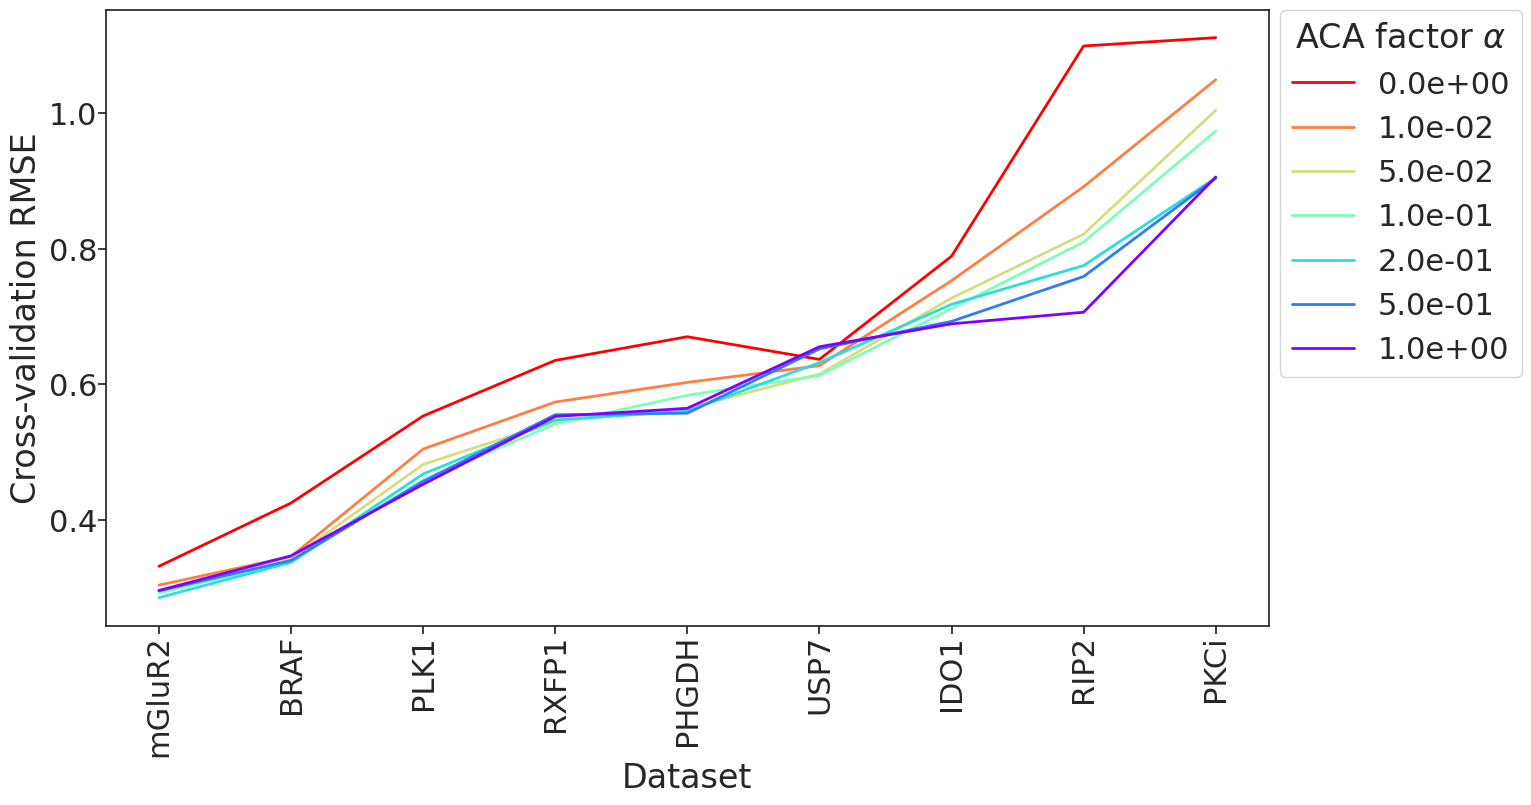

In [4]:

gs = glob('./benchmark_performance/mse_aca_opt_cliff/*/alpha_performance.csv')

ps = []
for path in gs:
    dataset = path.split('/')[-2]
    res = pd.read_csv(path, index_col=0)
    res['dataset'] = dataset
    ps.append(res)
    
dfp = pd.concat(ps)


dfp1 = pd.pivot_table(dfp, values='rmse', index='dataset', columns='alpha')
fig, ax = plt.subplots(figsize=(15, 8))
idx = dfp1.mean(axis=1).sort_values(ascending=True).index.tolist()
dfp1.columns = dfp1.columns.map(lambda x:'%.1e' % x)
dfp1 = dfp1.loc[idx]

dfp1.plot(ax= ax, colormap ='rainbow_r', lw = 2,)

ax.tick_params(left='off',  bottom='off', pad=.5,)

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title=r'ACA factor $\alpha$')

ax.set_ylabel('Cross-validation RMSE')
ax.set_xlabel('Dataset')


ax.set_xticks(range(len(dfp1)))

ax.set_xticklabels(dfp1.index, rotation=90, )

fig.savefig("./benchmark_performance/ACA_alpha_effect.pdf",  bbox_inches='tight')

In [5]:
from joblib import load, dump
w = 5
gs = glob('./benchmark_performance/mae_aca_opt_cliff/*/alpha_performance_rawdata.pkl')

res = []
for g in gs:
    data = load(g)
    df = pd.DataFrame(data)
    rmse = df.dfcv.apply(lambda x:x.rolling(w).mean().mean(axis=1).min()).to_frame(name= 'rmse')
    df = df.join(rmse)
    df = df[['alpha', 'repeat', 'rmse']]

In [6]:
from joblib import load, dump
w = 5
gs = glob('./benchmark_performance/mae_aca_opt_cliff/*/alpha_performance_rawdata.pkl')

mae_alpha = {}
res = []
for g in gs:
    data = load(g)
    df = pd.DataFrame(data)
    rmse = df.dfcv.apply(lambda x:x.rolling(w).mean().mean(axis=1).min()).to_frame(name= 'rmse')
    df = df.join(rmse)
    df = df[['alpha', 'repeat', 'rmse']]
    
    best_alpha = df.groupby('alpha').rmse.mean().idxmin()
    df = df[df.alpha.isin([0, best_alpha])]
    print(best_alpha)
    dataset =  g.split('/')[-2].upper()
    df['dataset'] = dataset
    df = df.reset_index(drop=True)
    df.alpha = df.alpha.map({0:'MAE', best_alpha:'MAE_ACA'})
    res.append(df)
    mae_alpha[dataset] = best_alpha
    
dff1 = pd.concat(res)

1.0
1.0
1.0
1.0
1.0
1.0
0.1
0.1
1.0


In [7]:
gs = glob('./benchmark_performance/mse_aca_opt_cliff/*/alpha_performance_rawdata.pkl')
mse_alpha = {}
res = []
for g in gs:
    data = load(g)
    df = pd.DataFrame(data)
    rmse = df.dfcv.apply(lambda x:x.rolling(w).mean().mean(axis=1).min()).to_frame(name= 'rmse')
    df = df.join(rmse)
    df = df[['alpha', 'repeat', 'rmse']]
    best_alpha = df.groupby('alpha').rmse.mean().idxmin()
    print(best_alpha)
    df = df[df.alpha.isin([0, best_alpha])]
    
    dataset =  g.split('/')[-2].upper()
    df['dataset'] = dataset
    df = df.reset_index(drop=True)
    df.alpha = df.alpha.map({0:'MSE', best_alpha:'MSE_ACA'})
    res.append(df)
    mse_alpha[dataset] = best_alpha
dff2 = pd.concat(res)

0.2
1.0
0.5
0.5
1.0
1.0
0.1
0.1
0.2


In [8]:
dff = dff1._append(dff2)
dff

,alpha,repeat,rmse,dataset
0,MAE,0,0.359680,BRAF
1,MAE,1,0.369642,BRAF
2,MAE,2,0.429440,BRAF
3,MAE,3,0.358038,BRAF
4,MAE,4,0.386237,BRAF
...,...,...,...,...
15,MSE_ACA,5,0.290032,MGLUR2
16,MSE_ACA,6,0.287401,MGLUR2
17,MSE_ACA,7,0.293225,MGLUR2
18,MSE_ACA,8,0.282756,MGLUR2


In [9]:
order = dff.groupby(['dataset']).rmse.mean().sort_values().index.tolist()
hue_order = ['MSE', 'MSE_ACA', 'MAE',  'MAE_ACA']
order

['MGLUR2', 'BRAF', 'PLK1', 'RXFP1', 'PHGDH', 'USP7', 'IDO1', 'RIP2', 'PKCI']

In [10]:
dff1

,alpha,repeat,rmse,dataset
0,MAE,0,0.359680,BRAF
1,MAE,1,0.369642,BRAF
2,MAE,2,0.429440,BRAF
3,MAE,3,0.358038,BRAF
4,MAE,4,0.386237,BRAF
...,...,...,...,...
15,MAE_ACA,5,0.290121,MGLUR2
16,MAE_ACA,6,0.309442,MGLUR2
17,MAE_ACA,7,0.303338,MGLUR2
18,MAE_ACA,8,0.291468,MGLUR2


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PLK1_MAE v.s. PLK1_MAE_ACA: t-test paired samples, P_val=1.827e-03 stat=3.894e+00
RXFP1_MSE v.s. RXFP1_MSE_ACA: t-test paired samples, P_val=1.869e-05 stat=7.488e+00
RXFP1_MAE v.s. RXFP1_MAE_ACA: t-test paired samples, P_val=1.150e-02 stat=2.736e+00
PHGDH_MSE v.s. PHGDH_MSE_ACA: t-test paired samples, P_val=4.327e-03 stat=3.341e+00
BRAF_MAE v.s. BRAF_MAE_ACA: t-test paired samples, P_val=2.391e-02 stat=2.289e+00
PLK1_MSE v.s. PLK1_MSE_ACA: t-test paired samples, P_val=2.545e-07 stat=1.260e+01
MGLUR2_MAE v.s. MGLUR2_MAE_ACA: t-test paired samples, P_val=4.345e-05 stat=6.716e+00
MGLUR2_MSE v.s. MGLUR2_MSE_ACA: t-test paired samples, P_val=4.403e-05 stat=6.705e+00
BRAF_MSE v.s. BRAF_MSE_ACA: t-test paired samples, P_val=4.805e-05 stat=6.628e+00
PHGDH_MAE v.s. PHGDH_MAE_ACA: t-test paired samples, P_val=1.576e-03 stat=3.991e+00


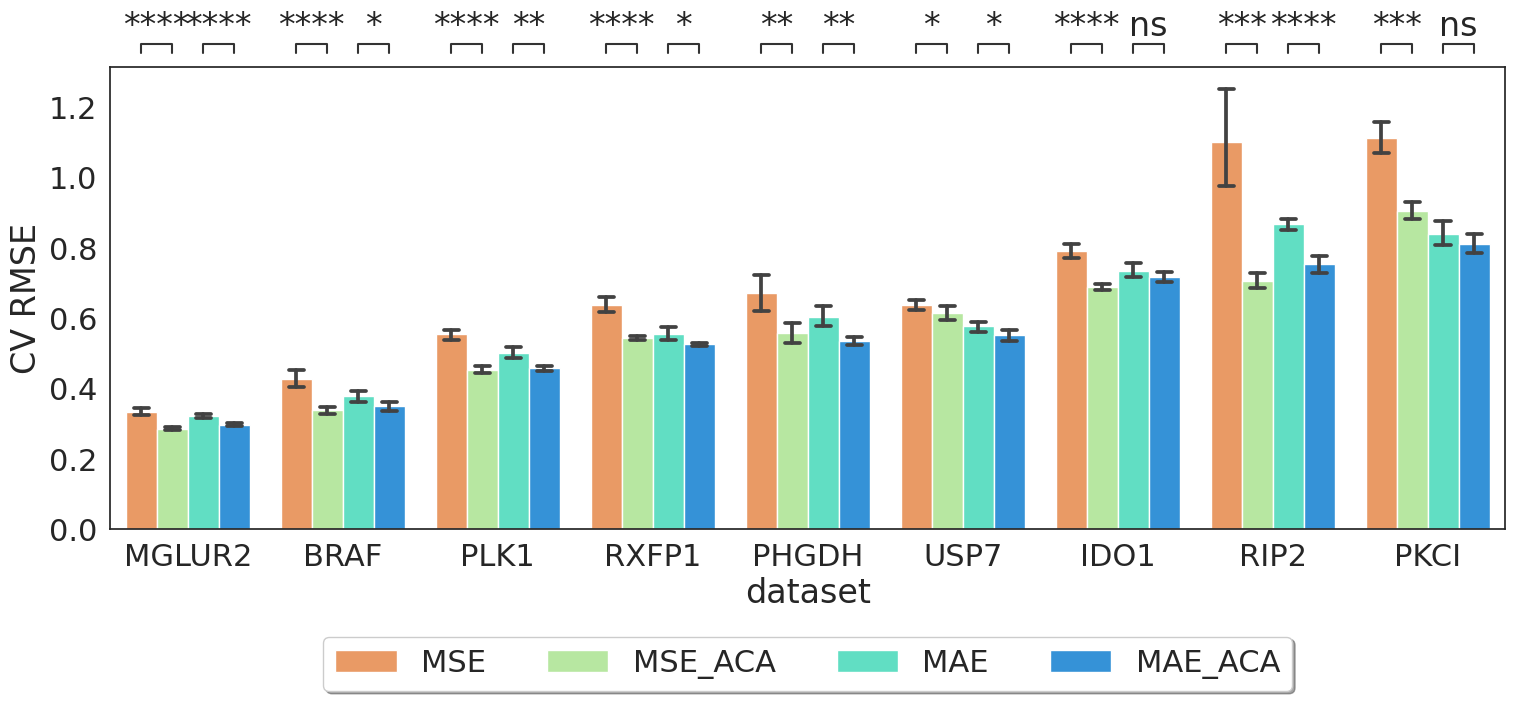

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x = 'dataset', y = 'rmse', data = dff, hue = 'alpha', order = order, capsize = 0.1,
             ax=ax, palette ='rainbow_r', alpha = 1, hue_order= hue_order)



box_pairs = []
for r in order:
    p = [((r, hue_order[0]), (r, hue_order[1])),  ((r, hue_order[2]), (r, hue_order[3]))]
    box_pairs.extend(p)
    
add_stat_annotation(ax, x = 'dataset', y = 'rmse', data = dff,  hue = 'alpha',
                    order = order,  hue_order= hue_order, 
                    box_pairs=box_pairs,
                    test='t-test_paired', 
                    stats_params={'alternative':'greater'},
                    comparisons_correction = None,
                    text_format='star', 
                    loc='outside', verbose=2)


ax.set_ylabel('CV RMSE')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)



In [16]:
m1 = pd.pivot_table(dff1, values='rmse', index='dataset', columns='alpha', aggfunc=np.mean)
m1 = m1.loc[order]

m1s = pd.pivot_table(dff1, values='rmse', index='dataset', columns='alpha', aggfunc=np.std)
m1s = m1s.loc[order]

m1.MAE = m1.MAE.apply(lambda x: '%.3f' % x) + '(±' + m1s.MAE.apply(lambda x: '%.3f' % x)+ ')'
m1.MAE_ACA = m1.MAE_ACA.apply(lambda x: '%.3f' % x) + '(±' + m1s.MAE_ACA.apply(lambda x: '%.3f' % x) + ')'

m1

alpha,MAE,MAE_ACA
dataset,,
MGLUR2,0.321(±0.008),0.297(±0.006)
BRAF,0.377(±0.027),0.348(±0.021)
PLK1,0.501(±0.026),0.457(±0.014)
RXFP1,0.555(±0.031),0.525(±0.009)
PHGDH,0.604(±0.048),0.534(±0.020)
USP7,0.576(±0.023),0.551(±0.028)
IDO1,0.735(±0.034),0.716(±0.024)
RIP2,0.866(±0.025),0.752(±0.041)
PKCI,0.840(±0.061),0.811(±0.047)


In [79]:
m1 = pd.pivot_table(dff1, values='rmse', index='dataset', columns='alpha', aggfunc=np.mean)
m1 = m1.loc[order]


boost = (m1.MAE - m1.MAE_ACA) / m1.MAE*100
m1['improvement'] = '↓' + boost.apply(lambda x: '%.2f' % x) + '%'

m1s = pd.pivot_table(dff1, values='rmse', index='dataset', columns='alpha', aggfunc=np.std)
#m1s = m1s.loc[order]

m1.MAE = m1.MAE.apply(lambda x: '%.3f' % x) + '(±' + m1s.MAE.apply(lambda x: '%.3f' % x)+ ')'
m1.MAE_ACA = m1.MAE_ACA.apply(lambda x: '%.3f' % x) + '(±' + m1s.MAE_ACA.apply(lambda x: '%.3f' % x) + ')'


In [80]:
m1

alpha,MAE,MAE_ACA,improvement
dataset,,,
MGLUR2,0.321(±0.008),0.297(±0.006),↓7.54%
BRAF,0.377(±0.027),0.348(±0.021),↓7.54%
PLK1,0.501(±0.026),0.457(±0.014),↓8.88%
RXFP1,0.555(±0.031),0.525(±0.009),↓5.37%
PHGDH,0.604(±0.048),0.534(±0.020),↓11.57%
USP7,0.576(±0.023),0.551(±0.028),↓4.33%
IDO1,0.735(±0.034),0.716(±0.024),↓2.65%
RIP2,0.866(±0.025),0.752(±0.041),↓13.16%
PKCI,0.840(±0.061),0.811(±0.047),↓3.37%


In [81]:
boost.mean()

7.1572217743297575

In [85]:
m1 = pd.pivot_table(dff1, values='rmse', index='dataset', columns='alpha', aggfunc=np.mean)
m1 = m1.loc[order]
m1.mean().round(3)

alpha
MAE        0.597
MAE_ACA    0.555
dtype: float64

In [87]:
m1.std().round(3)

alpha
MAE        0.189
MAE_ACA    0.177
dtype: float64

In [91]:
m2 = pd.pivot_table(dff2, values='rmse', index='dataset', columns='alpha', aggfunc=np.mean)
m2 = m2.loc[order]


boost = (m2.MSE - m2.MSE_ACA) / m2.MSE*100
m2['improvement'] = '↓' + boost.apply(lambda x: '%.2f' % x) + '%'


m2s = pd.pivot_table(dff2, values='rmse', index='dataset', columns='alpha', aggfunc=np.std)
m2s = m2s.loc[order]

m2.MSE = m2.MSE.apply(lambda x: '%.3f' % x) + '(±' + m2s.MSE.apply(lambda x: '%.3f' % x)+ ')'
m2.MSE_ACA = m2.MSE_ACA.apply(lambda x: '%.3f' % x) + '(±' + m2s.MSE_ACA.apply(lambda x: '%.3f' % x) + ')'

m2

alpha,MSE,MSE_ACA,improvement
dataset,,,
MGLUR2,0.332(±0.019),0.285(±0.005),↓13.94%
BRAF,0.425(±0.042),0.337(±0.017),↓20.61%
PLK1,0.553(±0.024),0.453(±0.017),↓18.21%
RXFP1,0.636(±0.036),0.542(±0.010),↓14.76%
PHGDH,0.670(±0.086),0.558(±0.049),↓16.82%
USP7,0.637(±0.024),0.613(±0.033),↓3.73%
IDO1,0.789(±0.033),0.689(±0.016),↓12.65%
RIP2,1.099(±0.237),0.707(±0.037),↓35.72%
PKCI,1.112(±0.078),0.904(±0.045),↓18.65%


In [92]:
m2 = pd.pivot_table(dff2, values='rmse', index='dataset', columns='alpha', aggfunc=np.mean)
m2 = m2.loc[order]

m2.mean().round(3)

alpha
MSE        0.695
MSE_ACA    0.565
dtype: float64

In [93]:
m2.std().round(3)

alpha
MSE        0.269
MSE_ACA    0.192
dtype: float64

In [94]:
boost.mean()

17.23267635803457

In [14]:
gs = glob('./benchmark_performance/mae_aca_opt_cliff/*/cliff_performance.csv')

res = []
for g in gs:
    dfc = pd.read_csv(g)
    ts = dfc.iloc[dfc.rmse.idxmin()]
    cliff = (ts.cl, ts.cu)
    dataset = g.split('/')[-2].upper()
    res.append({'dataset':dataset, 'cliff':cliff})
    
df1 = pd.DataFrame(res).set_index('dataset').loc[order]
df1['alpha'] = df1.index.map(mae_alpha)
df1

,cliff,alpha
dataset,,
MGLUR2,"(0.1, 0.5)",1.0
BRAF,"(0.1, 1.0)",1.0
PLK1,"(0.45, 0.5)",1.0
RXFP1,"(0.15, 0.5)",0.1
PHGDH,"(0.1, 1.0)",1.0
USP7,"(0.1, 2.5)",0.1
IDO1,"(1.08, 4.0)",1.0
RIP2,"(0.34, 2.0)",1.0
PKCI,"(0.21, 1.0)",1.0


In [15]:
gs = glob('./benchmark_performance/mse_aca_opt_cliff/*/cliff_performance.csv')

res = []
for g in gs:
    dfc = pd.read_csv(g)
    ts = dfc.iloc[dfc.rmse.idxmin()]
    cliff = (ts.cl, ts.cu)
    dataset = g.split('/')[-2].upper()
    res.append({'dataset':dataset, 'cliff':cliff})
    
df2 = pd.DataFrame(res).set_index('dataset').loc[order]
df2['alpha'] = df2.index.map(mse_alpha)
df2

,cliff,alpha
dataset,,
MGLUR2,"(0.45, 1.5)",0.2
BRAF,"(0.1, 1.5)",0.2
PLK1,"(0.66, 1.0)",1.0
RXFP1,"(0.7, 2.5)",0.1
PHGDH,"(1.52, 2.0)",0.5
USP7,"(0.1, 3.0)",0.1
IDO1,"(0.33, 1.0)",1.0
RIP2,"(0.1, 1.0)",1.0
PKCI,"(0.7, 2.5)",0.5
